In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

In [ ]:
x = np.arange(10)
y = np.sin(x)
z = np.cos(x)

In [ ]:
plt.plot(x, y)
plt.plot(x, z)

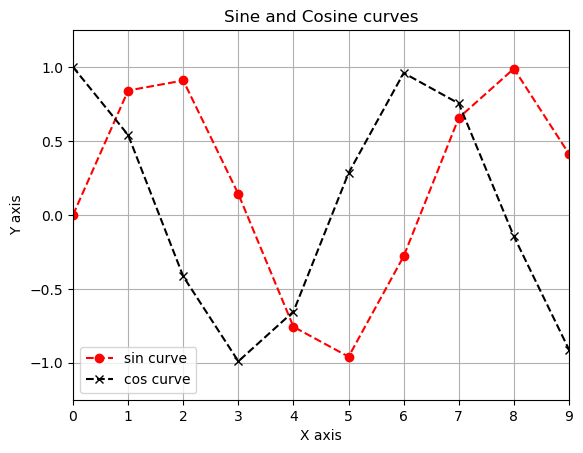

In [7]:
plt.plot(x, y, marker="o", color="r", linestyle="--", label="sin curve")
plt.plot(x, z, marker="x", color="k", linestyle="--", label="cos curve")
plt.xlabel("X axis");
plt.ylabel("Y axis")
plt.legend()
plt.xlim(0,9)
plt.ylim(-1.25, 1.25)

plt.title("Sine and Cosine curves")

plt.grid()


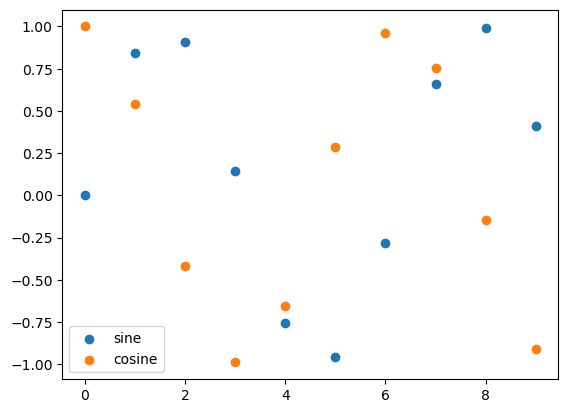

In [8]:
plt.scatter(x, y, label="sine")
plt.scatter(x, z, label="cosine")
plt.legend()

### Matplotlib functions may also be accessed through a lower level interface: axes

The "plt" interface does not allow us as much control over the plot elements. For greater control in more complicated plots, we need the axes interface

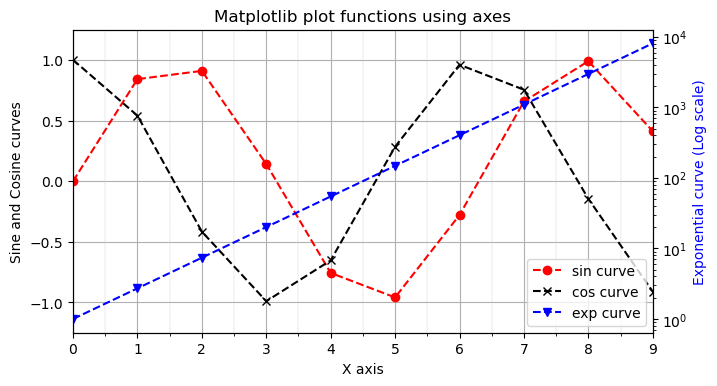

In [10]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()

line1, = ax.plot(x, y, marker="o", color="r", linestyle="--", label="sin curve")
line2, = ax.plot(x, z, marker="x", color="k", linestyle="--", label="cos curve")
#ax.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")
axr = plt.twinx()
line3, = axr.plot(x, np.exp(x), marker="v", color="b", linestyle="--", label="exp curve")

ax.set_xlabel("X axis");
ax.set_ylabel("Sine and Cosine curves")
ax.set_xlim(0,9)
ax.set_ylim(-1.25, 1.25)
ax.set_xticks(np.arange(0.5, 9), minor=True)

axr.set_ylabel("Exponential curve (Log scale)", color="b")
axr.set_yscale("log")
ax.set_title("Matplotlib plot functions using axes")

ax.grid()
ax.grid(which="minor", linestyle="--", linewidth=0.25)
ax.legend([line1, line2, line3], ["sin curve", "cos curve", "exp curve"], loc="lower right")

plt.savefig("./sin_cos_exp.pdf", dpi=150, bbox_inches="tight")

An exponential function on a log scale is linear, note the right hand side Y axis having a log scale!

In [ ]:
# alternatively, use get_legend_handles_labels()
handles, labels = ax.get_legend_handles_labels()

In [ ]:
labels

In [ ]:
np.std(y)

In [ ]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()

#line1, = ax.plot(x, y, color="r", linestyle="--", label="sin curve")
line1 = ax.errorbar(x, y, yerr=np.std(y), marker="o", color="r", linestyle="--", label="sin curve", capsize=5)
line2 = ax.errorbar(x, z, yerr=np.std(z), marker="x", color="k", linestyle="--", label="cos curve", capsize=5)
#ax.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")
axr = plt.twinx()
line3, = axr.plot(x, np.exp(x), marker="+", color="b", linestyle="--", label="exp curve")

ax.set_xlabel("X axis");
ax.set_ylabel("Sine and Cosine curves")
ax.set_xlim(0,9)
ax.set_ylim(-2, 2)
ax.set_xticks(np.arange(0.5, 9), minor=True)

axr.set_ylabel("Exponential curve (Log scale)", color="b")
axr.set_yscale("log")
ax.set_title("Matplotlib plot functions using axes")

ax.grid()
ax.grid(which="minor", linestyle="--", linewidth=0.25)
ax.legend([line1, line2, line3], ["sin curve", "cos curve", "exp curve"])

In [ ]:
fig = plt.figure(figsize=(190/25.4, 100/25.4) )
ax = plt.axes()
ax.fill_between(x, y-np.std(y), y+np.std(y), alpha=0.25, color="k")
ax.plot(x, y, color="k")
ax.grid()
ax.set_xlim(0,9)
ax.set_ylim(-2, 2)

## Bar plots

In [ ]:
plt.hist(np.random.randn(1000)*100, bins=100);

In [ ]:
plt.bar(np.arange(1,11), np.random.randn(10)*5+20 )

## Box plots

In [ ]:
x = np.array([np.random.randn(1000), np.random.randn(1000)*1.5+1]).T
plt.boxplot(x);

The box encloses the Q1 (1st quantile, or the 25th percentile value) to Q3 (3rd quantile, or the 75th percentile value) range. 

In [ ]:
np.quantile(x, 0.25), np.quantile(x, 0.75)

The whiskers are drawn at Q1 - 1.5\*IQR and Q3 + 1.5\*IQR, where IQR is the interquantile range. The circles are the outlier values beyond the whiskers. You can customize all these elements of the plot.

In [ ]:
Q1 = np.quantile(x, 0.25)
Q3 = np.quantile(x, 0.75)
IQR = Q3 - Q1
print(Q1 - 1.5*IQR, Q3 + 1.5*IQR)

## Representing 2 dimensional data using pcolormesh, contour, contourf

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
xc = x[:-1] + np.diff(x)[0] * 0.5 # center points of X axis
y = np.linspace(-2*np.pi, 2*np.pi, 100)
yc = y[:-1] + np.diff(y)[0] * 0.5 # center points of Y axis

XX, YY = np.meshgrid(xc,yc)

In [ ]:
x, xc

In [ ]:
XX.shape

In [ ]:
Z = np.sin(XX) + np.sin(YY)

In [ ]:
Z.shape

In [ ]:
PC = plt.pcolormesh(x, y, Z)
plt.colorbar(PC)

In [ ]:
CR = plt.contour(xc, yc, Z, colors="k")
plt.clabel(CR)

In [ ]:
CF = plt.contourf(xc, yc, Z)
plt.colorbar(CF)

In [ ]:
plt.style.available[:5]

In [ ]:
with plt.style.context("bmh"):
    plt.plot(x, np.sin(x))

Try changing the style context and have a look at available styles at the matplotlib gallery: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html